# Lab: Machine Learning and Data Acquisition

# Lab 2

## Setup

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
C:\Users\olsso\anaconda3\envs\DT374B\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Variables

In [54]:
weights = 'distance'

## Functions

In [2]:
def read_csv(filepath, cols, names):
    df = pd.read_csv(filepath, usecols=cols, names=names, header=None)
    df = df.drop([0], axis=0) # Remove first row (headers)
    df = df.astype('float64') # Cast data to floats
    
    return df

In [3]:
import glob

def read_csvs(class_name, set_name):
    names = ['ax', 'ay', 'az', 'mx', 'my', 'mz']
    X = pd.DataFrame()
    y = pd.DataFrame(columns=['class'])
    
    for file in glob.glob('data/cleaned/' + set_name + '/' + class_name + '*.csv'):
        if 'acc' in file:
            mag_file = file.replace('acc', 'mag')
            
            df_acc = read_csv(file, [1,2,3], names[:3])
            df_mag = read_csv(mag_file, [1,2,3], names[3:])
            
            df = pd.concat([df_acc, df_mag], axis=1, join='inner')
            X = X.append(df, ignore_index=True)
            
            print(file + '\tLength: ', end='')
            print(len(df_acc))
            print(mag_file + '\tLength: ', end='')
            print(len(df_mag))
            #print(X)
            
    y['class'] = [class_name for i in range(len(X))]
        
    return X, y

In [18]:
def calc_norms(df):
    l = []
    
    for i in range(len(df)):
        l.append(np.linalg.norm(df.iloc[i]))
        
    return pd.DataFrame({'Norm': l})

In [27]:
def calc_angle(df, axis, i):
    return np.rad2deg(np.arccos(df[axis].iloc[i] / np.linalg.norm(df.iloc[i])))

In [28]:
def calc_angles(df, axis):
    l = []
    
    for i in range(len(df)):
        l.append(calc_angle(df, axis, i))
        
    return pd.DataFrame({'Angle': l})

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def train_knn(X, y):
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'n_neighbors': np.arange(1, 60)}

    #use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(KNeighborsClassifier(weights = weights), param_grid, cv = 5)

    #fit model to data
    knn_gscv.fit(X, y.values.ravel())

    print('Best k:\t', knn_gscv.best_params_)
    print('Score:\t', knn_gscv.best_score_)

    return knn_gscv

In [56]:
from sklearn.model_selection import cross_val_score

def plot_accuracy_of_k(X, y):
    cv_scores = []
    my_range = range(1, 60)

    for k in my_range:
        knn_cv = KNeighborsClassifier(n_neighbors = k, weights = weights)
        cv_scores.append(cross_val_score(knn_cv, X, y.values.ravel(), cv = 5, scoring='accuracy').mean())

    df_scores = pd.DataFrame(cv_scores, index = my_range)
    df_scores.plot(xlabel = 'k', ylabel = 'Accuracy', legend = False)

In [57]:
from sklearn.metrics import confusion_matrix

def print_conf_matrix(X, y, knn):
    conf_matrix = confusion_matrix(y, knn.predict(X))
    print(knn.classes_)
    print(conf_matrix)

## Read data

### Raw cleaned data

In [6]:
X_sit_train, y_sit_train = read_csvs('sit', 'train')

data/cleaned/train\sit_acc1.csv	Length: 500
data/cleaned/train\sit_mag1.csv	Length: 500
data/cleaned/train\sit_acc2.csv	Length: 450
data/cleaned/train\sit_mag2.csv	Length: 450


In [7]:
X_stand_train, y_stand_train = read_csvs('stand', 'train')

data/cleaned/train\stand_acc1.csv	Length: 550
data/cleaned/train\stand_mag1.csv	Length: 550
data/cleaned/train\stand_acc2.csv	Length: 500
data/cleaned/train\stand_mag2.csv	Length: 500


In [8]:
X_lie_train, y_lie_train = read_csvs('lie', 'train')

data/cleaned/train\lie_acc1.csv	Length: 550
data/cleaned/train\lie_mag1.csv	Length: 550
data/cleaned/train\lie_acc2.csv	Length: 550
data/cleaned/train\lie_mag2.csv	Length: 550


In [9]:
X_sit_test, y_sit_test = read_csvs('sit', 'test')

data/cleaned/test\sit_acc3.csv	Length: 450
data/cleaned/test\sit_mag3.csv	Length: 450


In [10]:
X_stand_test, y_stand_test = read_csvs('stand', 'test')

data/cleaned/test\stand_acc3.csv	Length: 600
data/cleaned/test\stand_mag3.csv	Length: 600


In [11]:
X_lie_test, y_lie_test = read_csvs('lie', 'test')

data/cleaned/test\lie_acc3.csv	Length: 550
data/cleaned/test\lie_mag3.csv	Length: 550


In [13]:
X_train = pd.concat([X_sit_train, X_stand_train, X_lie_train], ignore_index=True)
y_train = pd.concat([y_sit_train, y_stand_train, y_lie_train], ignore_index=True)

In [16]:
X_test = pd.concat([X_sit_test, X_stand_test, X_lie_test], ignore_index=True)
y_test = pd.concat([y_sit_test, y_stand_test, y_lie_test], ignore_index=True)

### Transformed raw cleaned data (norms and angles)

In [42]:
X_train_acc_norms = calc_norms(X_train[['ax','ay','az']])
X_train_acc_norms.rename(columns={'Norm': 'Acc norm'}, inplace=True)

X_test_acc_norms = calc_norms(X_test[['ax','ay','az']])
X_test_acc_norms.rename(columns={'Norm': 'Acc norm'}, inplace=True)

In [34]:
X_train_mag_norms = calc_norms(X_train[['mx','my','mz']])
X_train_mag_norms.rename(columns={'Norm': 'Mag norm'}, inplace=True)

X_test_mag_norms = calc_norms(X_test[['mx','my','mz']])
X_test_mag_norms.rename(columns={'Norm': 'Mag norm'}, inplace=True)

In [35]:
X_train_acc_angles = calc_angles(X_train[['ax','ay','az']], X_train.columns[2])
X_train_acc_angles.rename(columns={'Angle': 'Acc z angle'}, inplace=True)

X_test_acc_angles = calc_angles(X_test[['ax','ay','az']], X_train.columns[2])
X_test_acc_angles.rename(columns={'Angle': 'Acc z angle'}, inplace=True)

In [36]:
X_train_mag_angles = calc_angles(X_train[['mx','my','mz']], X_train.columns[4])
X_train_mag_angles.rename(columns={'Angle': 'Mag y angle'}, inplace=True)

X_test_mag_angles = calc_angles(X_test[['mx','my','mz']], X_train.columns[4])
X_test_mag_angles.rename(columns={'Angle': 'Mag y angle'}, inplace=True)

In [50]:
X_train_transformed = pd.concat([X_train_acc_norms, X_train_mag_norms, X_train_acc_angles, X_train_mag_angles], axis = 1)
X_test_transformed = pd.concat([X_test_acc_norms, X_test_mag_norms, X_test_acc_angles, X_test_mag_angles], axis = 1)

## Tasks

#### The iris set is evaluated in a separate file: lab2_iris.ipynb

### KNN once again with your own recorded data

#### 1. Should you use the standard scaler or not when you work with the data? You need to motivate your answer and explain why

If only accelerometer values are used no scaling is required since the are already to the same scale.<p>
If both accelerometer and magnetometer values are used scaling might be required as the magnetometer values generally are larger.

In [60]:
X_train.describe()

,ax,ay,az,mx,my,mz
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,1.467447,-4.312653,5.186234,-31.870930,22.152321,-15.236801
std,3.178907,3.635546,4.976354,17.411648,22.519195,14.456745
min,-2.589932,-9.559626,-2.177170,-59.325000,-3.300000,-38.568752
25%,-1.598405,-9.288938,-1.489831,-51.956253,4.326562,-26.325000
50%,0.623629,-2.394916,7.432406,-30.665627,10.593750,-16.987500
75%,4.994120,-1.197010,9.704391,-13.837501,52.331253,0.675000
max,6.625427,-1.055833,9.934401,-7.106250,55.631252,6.881250


#### 2. Train the KNN classifier with your training data (cross validation!) Choose the k value that is optimal. You should present the result accuracy as a function of k. Present the confusion matrix and explain the result.

As seen below no scaling was required using all features - the model predicted all instances correctly.

In [63]:
knn_all_features = train_knn(X_train, y_train)

Best k:	 {'n_neighbors': 1}
Score:	 1.0


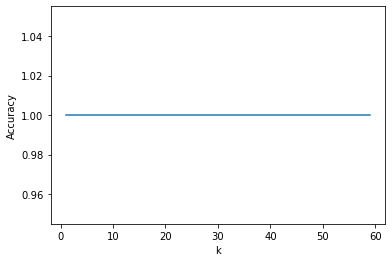

In [64]:
plot_accuracy_of_k(X_train, y_train)

In [65]:
print_conf_matrix(X_train, y_train, knn_all_features)

['lie' 'sit' 'stand']
[[1100    0    0]
 [   0  950    0]
 [   0    0 1050]]


#### 3. Test the KNN classifier with the optimal k using the test data set. Present the accuracy and confusion matrix. Explain the result and compare it with the training set.

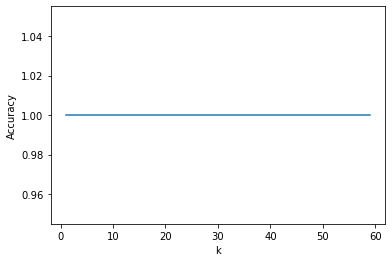

In [66]:
plot_accuracy_of_k(X_test, y_test)

In [67]:
knn_all_features.best_score_

1.0

In [68]:
print_conf_matrix(X_test, y_test, knn_all_features)

['lie' 'sit' 'stand']
[[550   0   0]
 [  0 450   0]
 [  0   0 600]]


#### 4. Redo point 2 and 3 but only use feature 1-3. Compare with the result in 3 with point 3 above.

In [69]:
knn_acc = train_knn(X_train[['ax', 'ay', 'az']], y_train)

Best k:	 {'n_neighbors': 1}
Score:	 1.0


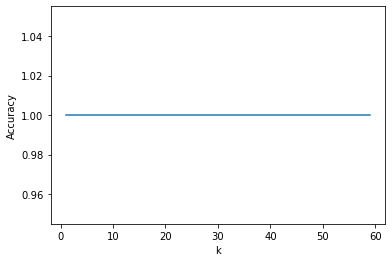

In [70]:
plot_accuracy_of_k(X_train[['ax', 'ay', 'az']], y_train)

In [71]:
print_conf_matrix(X_train[['ax', 'ay', 'az']], y_train, knn_acc)

['lie' 'sit' 'stand']
[[1100    0    0]
 [   0  950    0]
 [   0    0 1050]]


In [74]:
print_conf_matrix(X_test[['ax', 'ay', 'az']], y_test, knn_acc)

['lie' 'sit' 'stand']
[[550   0   0]
 [  0 450   0]
 [  0   0 600]]


#### 5. Redo point 2 and 3 but only use feature 4-6. Compare with the result in 3 with point 3 above.

In [79]:
knn_mag = train_knn(X_train[['mx', 'my', 'mz']], y_train)

Best k:	 {'n_neighbors': 1}
Score:	 1.0


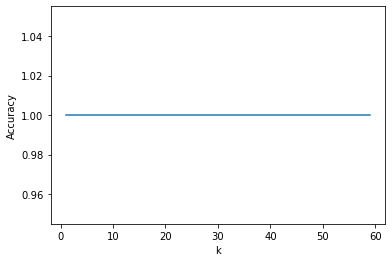

In [80]:
plot_accuracy_of_k(X_train[['mx', 'my', 'mz']], y_train)

In [81]:
print_conf_matrix(X_train[['mx', 'my', 'mz']], y_train, knn_mag)

['lie' 'sit' 'stand']
[[1100    0    0]
 [   0  950    0]
 [   0    0 1050]]


In [82]:
print_conf_matrix(X_test[['mx', 'my', 'mz']], y_test, knn_mag)

['lie' 'sit' 'stand']
[[550   0   0]
 [  0 450   0]
 [  0   0 600]]


### KNN– with transformed recorded data